In [23]:
import pandas as pd
from ast import literal_eval
from datetime import datetime
import random

In [16]:
df

,submittedDate,authorAffiliations,title,abstract,subjectCategories,citationURL,submittedYear
21,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091050, ...",Aeronautic Power Plant Investigations,"Report presents the design of radiators, spark...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091050,2013
123,2013-09-07,"[{'sequence': 0, 'submissionId': 20030082190, ...",Theory of Lifting Surfaces,A mathematical model is presented towards a th...,['Theoretical Mathematics'],https://ntrs.nasa.gov/citations/20030082190,2013
223,2013-09-07,"[{'sequence': 0, 'submissionId': 20050241729, ...",Calculation of wing spars,The author presents a comparison and combinati...,['Computer Programming And Software'],https://ntrs.nasa.gov/citations/20050241729,2013
475,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091180, ...",Applications of Modern Hydrodynamics to Aerona...,"The report gives, rather briefly, in part one ...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091180,2013
517,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091456, ...",The Minimum Induced Drag of Aerofoils,This report helps explain the phenomenon of fl...,['Aerodynamics'],https://ntrs.nasa.gov/citations/19930091456,2013
...,...,...,...,...,...,...,...
571701,2023-03-28,[{'organizationId': 'bea8bef598ef5fbfbbb0a3f74...,Towards a Coherent View of Evidence in Safety ...,This paper explains why labeling something as ...,"['Computer Systems', 'Air Transportation and S...",https://ntrs.nasa.gov/citations/20230003336,2023
571703,2023-05-24,[{'organizationId': '4c6a2b878d76521da887cdcb2...,Ensuring Safety of Government Personnel During...,The NASA Suborbital Crew (SubC) project is foc...,['Space Transportation and Safety'],https://ntrs.nasa.gov/citations/20230008107,2023
571704,2023-05-16,[{'organizationId': '5a078aec66f45971ad4144096...,Flight Dynamics and Navigation Performance of ...,BioSentinel was one of ten CubeSats launched b...,['Astrodynamics'],https://ntrs.nasa.gov/citations/20230007624,2023
571705,2023-07-07,[{'organizationId': 'fdea3daf3b5156699f511edf3...,Demonstration of GaN HEMT MMIC High-Power Ampl...,"In this paper, we demonstrate a Ka-band high p...","['Space Communications, Spacecraft Communicati...",https://ntrs.nasa.gov/citations/20230009999,2023


In [3]:
# !wget https://sti.nasa.gov/docs/ntrs-public-metadata.json.gz
# !gzip -d ntrs-public-metadata.json.gz

--2023-09-07 16:47:58--  https://sti.nasa.gov/docs/ntrs-public-metadata.json.gz
Resolving sti.nasa.gov (sti.nasa.gov)... 161.40.161.175, 161.40.161.137
Connecting to sti.nasa.gov (sti.nasa.gov)|161.40.161.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 327501632 (312M) [application/octet-stream]
Saving to: 'ntrs-public-metadata.json.gz'

ntrs-public-metadat 100%[===================>] 312.33M  7.60MB/s    in 36s     

2023-09-07 16:48:35 (8.75 MB/s) - 'ntrs-public-metadata.json.gz' saved [327501632/327501632]



In [10]:
# df = pd.read_json('ntrs-public-metadata.json')
# df.T.to_csv('../data/ntrs-bulk-download.csv', index = False)

In [2]:
df = pd.read_csv('../data/ntrs-bulk-download.csv', low_memory = False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571707 entries, 0 to 571706
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   copyright             571707 non-null  object
 1   keywords              102049 non-null  object
 2   exportControl         571706 non-null  object
 3   created               571707 non-null  object
 4   distributionDate      571707 non-null  object
 5   center                571707 non-null  object
 6   onlyAbstract          571707 non-null  bool  
 7   sensitiveInformation  571707 non-null  int64 
 8   abstract              542326 non-null  object
 9   title                 571707 non-null  object
 10  stiType               571707 non-null  object
 11  distribution          571707 non-null  object
 12  authorAffiliations    547629 non-null  object
 13  disseminated          571707 non-null  object
 14  stiTypeDetails        571707 non-null  object
 15  technicalReviewTy

In [3]:
df['citationURL'] = ['https://ntrs.nasa.gov/citations/' + str(ast.literal_eval(row)[0]['submissionId']) for row in df.publications]

df['submittedDate'] = [str(row).split('T')[0] for row in df['submittedDate']]

df['submittedDate'] = pd.to_datetime(df['submittedDate'], format='%Y-%m-%d').dt.strftime('%Y-%m-%d')

df = df[df['abstract'] != 'No abstract available']

df = df[df['abstract'] != 'There are no author-identified significant results in this report.']

In [4]:
df.dropna(subset=['submittedDate',
                  'authorAffiliations',
                  'title',
                  'abstract',
                  'subjectCategories',
                  'citationURL'],
          inplace = True)

In [5]:
columns = ['submittedDate', 'authorAffiliations', 'title', 'abstract', 'subjectCategories', 'citationURL']

df = df[columns]

<AxesSubplot:>

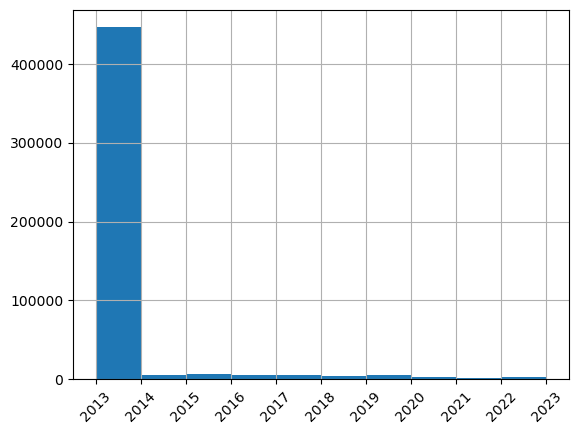

In [7]:
df['submittedYear'] = [row[:4] for row in df.submittedDate]
df.submittedYear.sort_values().hist(xrot=45)

In [8]:
df.groupby(by = 'subjectCategories')['title'].count().to_frame().sort_values(by = 'title', ascending = False)[:20]

,title
subjectCategories,
['Geophysics'],24996
['Astrophysics'],21706
['Earth Resources And Remote Sensing'],15266
['Aerodynamics'],14862
['Lunar And Planetary Exploration'],14151
['Meteorology And Climatology'],13427
['Instrumentation And Photography'],13069
['Space Sciences'],11658
['Astronomy'],11157


In [9]:
df[df.submittedYear == '2023'].groupby(by = 'subjectCategories')['title']\
                              .count()\
                              .to_frame()\
                              .sort_values(by = 'title',
                                           ascending = False)[:20]

,title
subjectCategories,
['Earth Resources and Remote Sensing'],67
['Geosciences (General)'],36
['Astrophysics'],35
['Astronomy'],26
['Fluid Mechanics and Thermodynamics'],24
['Meteorology and Climatology'],23
['Air Transportation and Safety'],19
['Life Sciences (General)'],19
"['Astronomy', 'Astrophysics']",19


In [10]:
df[df.title == 'Collaborative Product Development in an R&D Environment']

,submittedDate,authorAffiliations,title,abstract,subjectCategories,citationURL,submittedYear
460592,2013-09-07,"[{'sequence': 0, 'submissionId': 20040045335, ...",Collaborative Product Development in an R&D En...,Research and development (R&D) organizations a...,['Administration And Management'],https://ntrs.nasa.gov/citations/20040045335,2013


In [12]:
literal_eval(df.iloc[111111]['authorAffiliations'])[0]

{'sequence': 0,
 'submissionId': 19740000230,
 'meta': {'author': {'name': 'Auer, S. O.'}, 'organization': {}},
 'id': '2ada0a854af04139839f165f2aabf6a1'}

In [21]:
def extract_authors_and_affiliations(row):
    try:
        author_data = literal_eval(row['authorAffiliations'])
        authors = []
        for author_info in author_data:
            author = author_info['meta']['author']['name']
#             organization = author_info['meta']['organization']['name']
#             location = author_info['meta']['organization']['location']
            authors.append(
                author + ';',
#                 'organization': organization,
#                 'location': location
            )
        return authors
    except (ValueError, TypeError, KeyError):
        return None

df['parsedAuthors'] = df.apply(extract_authors_and_affiliations, axis=1)

df

,submittedDate,authorAffiliations,title,abstract,subjectCategories,citationURL,submittedYear,parsedAuthors
21,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091050, ...",Aeronautic Power Plant Investigations,"Report presents the design of radiators, spark...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091050,2013,"[Dickinson, H C;]"
123,2013-09-07,"[{'sequence': 0, 'submissionId': 20030082190, ...",Theory of Lifting Surfaces,A mathematical model is presented towards a th...,['Theoretical Mathematics'],https://ntrs.nasa.gov/citations/20030082190,2013,"[Prandtl, L.;]"
223,2013-09-07,"[{'sequence': 0, 'submissionId': 20050241729, ...",Calculation of wing spars,The author presents a comparison and combinati...,['Computer Programming And Software'],https://ntrs.nasa.gov/citations/20050241729,2013,"[Muller-Breslau, H;]"
475,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091180, ...",Applications of Modern Hydrodynamics to Aerona...,"The report gives, rather briefly, in part one ...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091180,2013,"[Prandtl, L;]"
517,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091456, ...",The Minimum Induced Drag of Aerofoils,This report helps explain the phenomenon of fl...,['Aerodynamics'],https://ntrs.nasa.gov/citations/19930091456,2013,"[Munk, Max M;]"
...,...,...,...,...,...,...,...,...
571701,2023-03-28,[{'organizationId': 'bea8bef598ef5fbfbbb0a3f74...,Towards a Coherent View of Evidence in Safety ...,This paper explains why labeling something as ...,"['Computer Systems', 'Air Transportation and S...",https://ntrs.nasa.gov/citations/20230003336,2023,"[Finlay McCardel;, C. Michael Holloway;, Kimbe..."
571703,2023-05-24,[{'organizationId': '4c6a2b878d76521da887cdcb2...,Ensuring Safety of Government Personnel During...,The NASA Suborbital Crew (SubC) project is foc...,['Space Transportation and Safety'],https://ntrs.nasa.gov/citations/20230008107,2023,"[Elizabeth C Blome;, Darren H Gibson;, Eric N ..."
571704,2023-05-16,[{'organizationId': '5a078aec66f45971ad4144096...,Flight Dynamics and Navigation Performance of ...,BioSentinel was one of ten CubeSats launched b...,['Astrodynamics'],https://ntrs.nasa.gov/citations/20230007624,2023,"[Andres Dono Perez;, Jose L Alvarellos;]"
571705,2023-07-07,[{'organizationId': 'fdea3daf3b5156699f511edf3...,Demonstration of GaN HEMT MMIC High-Power Ampl...,"In this paper, we demonstrate a Ka-band high p...","['Space Communications, Spacecraft Communicati...",https://ntrs.nasa.gov/citations/20230009999,2023,"[Rainee N. Simons;, Marie T. Piasecki;, Joseph..."


In [18]:
df.dropna(subset='parsedAuthors')

,submittedDate,authorAffiliations,title,abstract,subjectCategories,citationURL,submittedYear,parsedAuthors
21,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091050, ...",Aeronautic Power Plant Investigations,"Report presents the design of radiators, spark...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091050,2013,"[Dickinson, H C;]"
123,2013-09-07,"[{'sequence': 0, 'submissionId': 20030082190, ...",Theory of Lifting Surfaces,A mathematical model is presented towards a th...,['Theoretical Mathematics'],https://ntrs.nasa.gov/citations/20030082190,2013,"[Prandtl, L.;]"
223,2013-09-07,"[{'sequence': 0, 'submissionId': 20050241729, ...",Calculation of wing spars,The author presents a comparison and combinati...,['Computer Programming And Software'],https://ntrs.nasa.gov/citations/20050241729,2013,"[Muller-Breslau, H;]"
475,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091180, ...",Applications of Modern Hydrodynamics to Aerona...,"The report gives, rather briefly, in part one ...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091180,2013,"[Prandtl, L;]"
517,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091456, ...",The Minimum Induced Drag of Aerofoils,This report helps explain the phenomenon of fl...,['Aerodynamics'],https://ntrs.nasa.gov/citations/19930091456,2013,"[Munk, Max M;]"
...,...,...,...,...,...,...,...,...
571701,2023-03-28,[{'organizationId': 'bea8bef598ef5fbfbbb0a3f74...,Towards a Coherent View of Evidence in Safety ...,This paper explains why labeling something as ...,"['Computer Systems', 'Air Transportation and S...",https://ntrs.nasa.gov/citations/20230003336,2023,"[Finlay McCardel;, C. Michael Holloway;, Kimbe..."
571703,2023-05-24,[{'organizationId': '4c6a2b878d76521da887cdcb2...,Ensuring Safety of Government Personnel During...,The NASA Suborbital Crew (SubC) project is foc...,['Space Transportation and Safety'],https://ntrs.nasa.gov/citations/20230008107,2023,"[Elizabeth C Blome;, Darren H Gibson;, Eric N ..."
571704,2023-05-16,[{'organizationId': '5a078aec66f45971ad4144096...,Flight Dynamics and Navigation Performance of ...,BioSentinel was one of ten CubeSats launched b...,['Astrodynamics'],https://ntrs.nasa.gov/citations/20230007624,2023,"[Andres Dono Perez;, Jose L Alvarellos;]"
571705,2023-07-07,[{'organizationId': 'fdea3daf3b5156699f511edf3...,Demonstration of GaN HEMT MMIC High-Power Ampl...,"In this paper, we demonstrate a Ka-band high p...","['Space Communications, Spacecraft Communicati...",https://ntrs.nasa.gov/citations/20230009999,2023,"[Rainee N. Simons;, Marie T. Piasecki;, Joseph..."


In [44]:
literal_eval(df.iloc[2]['authorAffiliations'])[0]['meta']['author']['name']

'Hunsaker, J C'

In [42]:
df['authors'] = literal_eval(df.iloc[2]['authorAffiliations'])[0]['meta']['author']

1970-08-16 21:27:45.840                                                  NaN
1970-08-19 16:08:11.025                                                  NaN
1970-08-19 16:08:11.026    [{'sequence': 0, 'submissionId': 19930091026, ...
1970-08-19 16:08:11.027    [{'sequence': 0, 'submissionId': 19930091027, ...
1970-08-19 16:08:11.034                                                  NaN
                                                 ...                        
1970-08-23 03:26:46.399    [{'organizationId': 'efb1c389f6e95ddd810caa5fd...
1970-08-23 03:26:46.439    [{'organizationId': 'fdea3daf3b5156699f511edf3...
1970-08-23 03:26:46.518    [{'organizationId': 'c5811e58a0365b0bae8111527...
1970-08-23 03:26:48.107    [{'organizationId': '4c6a2b878d76521da887cdcb2...
1970-08-23 03:26:47.624    [{'organizationId': '5a078aec66f45971ad4144096...
Name: authorAffiliations, Length: 571443, dtype: object

In [146]:
df.iloc[random.randint(0, len(df))]['title']

'Dynamics of aerospace vehicles'

In [25]:
df2 = df[(df.submittedDate >= '2013-09-06') &
         (df.submittedDate <= '2014-01-01')]

df2

,submittedDate,authorAffiliations,title,abstract,subjectCategories,citationURL,submittedYear,parsedAuthors
21,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091050, ...",Aeronautic Power Plant Investigations,"Report presents the design of radiators, spark...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091050,2013,"[Dickinson, H C;]"
123,2013-09-07,"[{'sequence': 0, 'submissionId': 20030082190, ...",Theory of Lifting Surfaces,A mathematical model is presented towards a th...,['Theoretical Mathematics'],https://ntrs.nasa.gov/citations/20030082190,2013,"[Prandtl, L.;]"
223,2013-09-07,"[{'sequence': 0, 'submissionId': 20050241729, ...",Calculation of wing spars,The author presents a comparison and combinati...,['Computer Programming And Software'],https://ntrs.nasa.gov/citations/20050241729,2013,"[Muller-Breslau, H;]"
475,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091180, ...",Applications of Modern Hydrodynamics to Aerona...,"The report gives, rather briefly, in part one ...",['Aeronautics (General)'],https://ntrs.nasa.gov/citations/19930091180,2013,"[Prandtl, L;]"
517,2013-09-06,"[{'sequence': 0, 'submissionId': 19930091456, ...",The Minimum Induced Drag of Aerofoils,This report helps explain the phenomenon of fl...,['Aerodynamics'],https://ntrs.nasa.gov/citations/19930091456,2013,"[Munk, Max M;]"
...,...,...,...,...,...,...,...,...
518844,2013-12-23,"[{'sequence': 0, 'submissionId': 20130014835, ...",Continued Evaluation of Gear Condition Indicat...,This paper details analyses of condition indic...,['Aeronautics (General)'],https://ntrs.nasa.gov/citations/20130014835,2013,"[Delgado, Irebert R.;, Dempsey, Paula J.;, Ant..."
518845,2013-12-23,"[{'sequence': 0, 'submissionId': 20130014845, ...",Experiment Description and Results for Arrival...,The predicted increase in the number of commer...,['Air Transportation And Safety'],https://ntrs.nasa.gov/citations/20130014845,2013,"[Baxley, Brian T.;, Murdoch, Jennifer L.;, Swi..."
518846,2013-12-30,"[{'sequence': 0, 'submissionId': 20130014926, ...",Methodologies for Combined Loads Tests Using a...,The NASA Langley COmbined Loads Test System (C...,['Structural Mechanics'],https://ntrs.nasa.gov/citations/20130014926,2013,"[Rouse, Marshall;]"
518847,2013-12-30,"[{'sequence': 0, 'submissionId': 20130014927, ...",Shape and Stress Sensing of Multilayered Compo...,The marked increase in the use of composite an...,['Structural Mechanics'],https://ntrs.nasa.gov/citations/20130014927,2013,"[Cerracchio, Priscilla;, Gherlone, Marco;, Di ..."


In [15]:
df.explode('subjectCategories')

submittedDate                                                2013-09-07
authorAffiliations    [{'sequence': 0, 'submissionId': 20090015316, ...
title                 The Effect of Surface Irregularities on Wing Drag
abstract              Tests have been made in the N.A.C.A. 8-foot hi...
subjectCategories                                      ['Aerodynamics']
citationURL                 https://ntrs.nasa.gov/citations/20090015316
submittedYear                                                      2013
Name: 2485, dtype: object